# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# PHẦN 1: QUY TRÌNH KHOA HỌC DỮ LIỆU

## A Thu thập dữ liệu (Data collection)

## B Khám phá dữ liệu (thường đan xen với tiền xử lý dữ liệu)

## C Đặt các câu hỏi có ý nghĩa cần trả lời

# PHẦN 2: MÔ HÌNH HÓA DỮ LIỆU

## A Tiền xử lí dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [5]:
weather_df = pd.read_csv("Data/hcm_weather_info.csv")
weather_df.head()

,Date,Weather Type,Average Temperature,Highest Temperature,Lowest Temperature,Wind Speed,Rain,Humidity,Cloud,Pressure
0,2010-01-01,Partly cloudy,28.4,34,24,6,0.0,59,20,1010
1,2010-01-02,Cloudy,27.0,32,24,7,0.0,61,48,1010
2,2010-01-03,Partly cloudy,28.1,33,26,7,0.0,65,37,1010
3,2010-01-04,Partly cloudy,28.2,35,25,9,0.1,61,42,1009
4,2010-01-05,Partly cloudy,28.8,35,26,10,0.0,57,35,1009


### Kiểm tra số dòng, số cột và có giá trị thiếu, trùng lặp hay không?

In [12]:
#shape data
weather_df.shape

(4380, 10)

In [13]:
#check null
weather_df.isnull().sum()

Date                   0
Weather Type           0
Average Temperature    0
Highest Temperature    0
Lowest Temperature     0
Wind Speed             0
Rain                   0
Humidity               0
Cloud                  0
Pressure               0
dtype: int64

Dữ liệu không có cột nào chứa giá trị thiếu

In [17]:
#check duplicated
np.any(weather_df.duplicated())

False

### Chuyển đổi đúng kiểu dữ liệu của cột

In [9]:
weather_df.dtypes

Date                   datetime64[ns]
Weather Type                   object
Average Temperature           float64
Highest Temperature             int64
Lowest Temperature              int64
Wind Speed                      int64
Rain                          float64
Humidity                        int64
Cloud                           int64
Pressure                        int64
dtype: object

Chuyển cột "Date" từ object sang datetime64[ns]

In [10]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

## B Khám phá dữ liệu

### Với cột có kiểu dữ liệu phân loại ( "Weather Type" )

In [19]:
def num_diff_vals(s):
    return s.nunique()
def diff_vals(s):
    return s.unique()
weather_df[["Weather Type"]].agg([num_diff_vals, diff_vals])

,Weather Type
num_diff_vals,20
diff_vals,"[Partly cloudy, Cloudy, Sunny, Patchy light dr..."


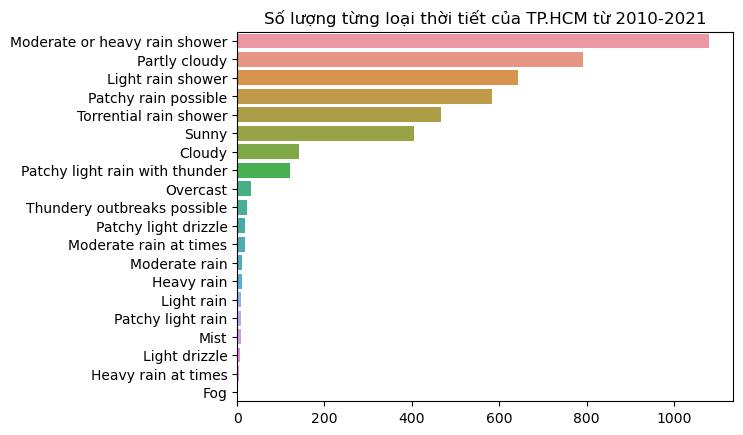

In [53]:
count_weather = weather_df['Weather Type'].value_counts()
sns.barplot(y=count_weather.index, x = count_weather.values, orient='h').set(title= "Số lượng từng loại thời tiết của TP.HCM từ 2010-2021");

### Với cột có kiểu dữ liệu số

In [20]:
weather_df.describe()

,Average Temperature,Highest Temperature,Lowest Temperature,Wind Speed,Rain,Humidity,Cloud,Pressure
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,28.376712,33.035616,25.200228,9.413014,7.477968,73.594521,37.042466,1009.256849
std,1.655659,2.474554,1.647616,3.431909,10.980748,10.010817,18.737816,2.076964
min,21.400000,22.000000,16.000000,3.000000,0.000000,45.000000,0.000000,1003.000000
25%,27.400000,32.000000,24.000000,7.000000,0.100000,66.000000,23.000000,1008.000000
50%,28.200000,33.000000,25.000000,9.000000,3.300000,75.000000,34.000000,1009.000000
75%,29.500000,35.000000,26.000000,12.000000,11.100000,82.000000,50.000000,1011.000000
max,33.800000,41.000000,30.000000,26.000000,253.300000,96.000000,99.000000,1016.000000


Scatter plot của từng thuộc tính số này với thuộc tính số khác và Histogram của từng thuộc tính số

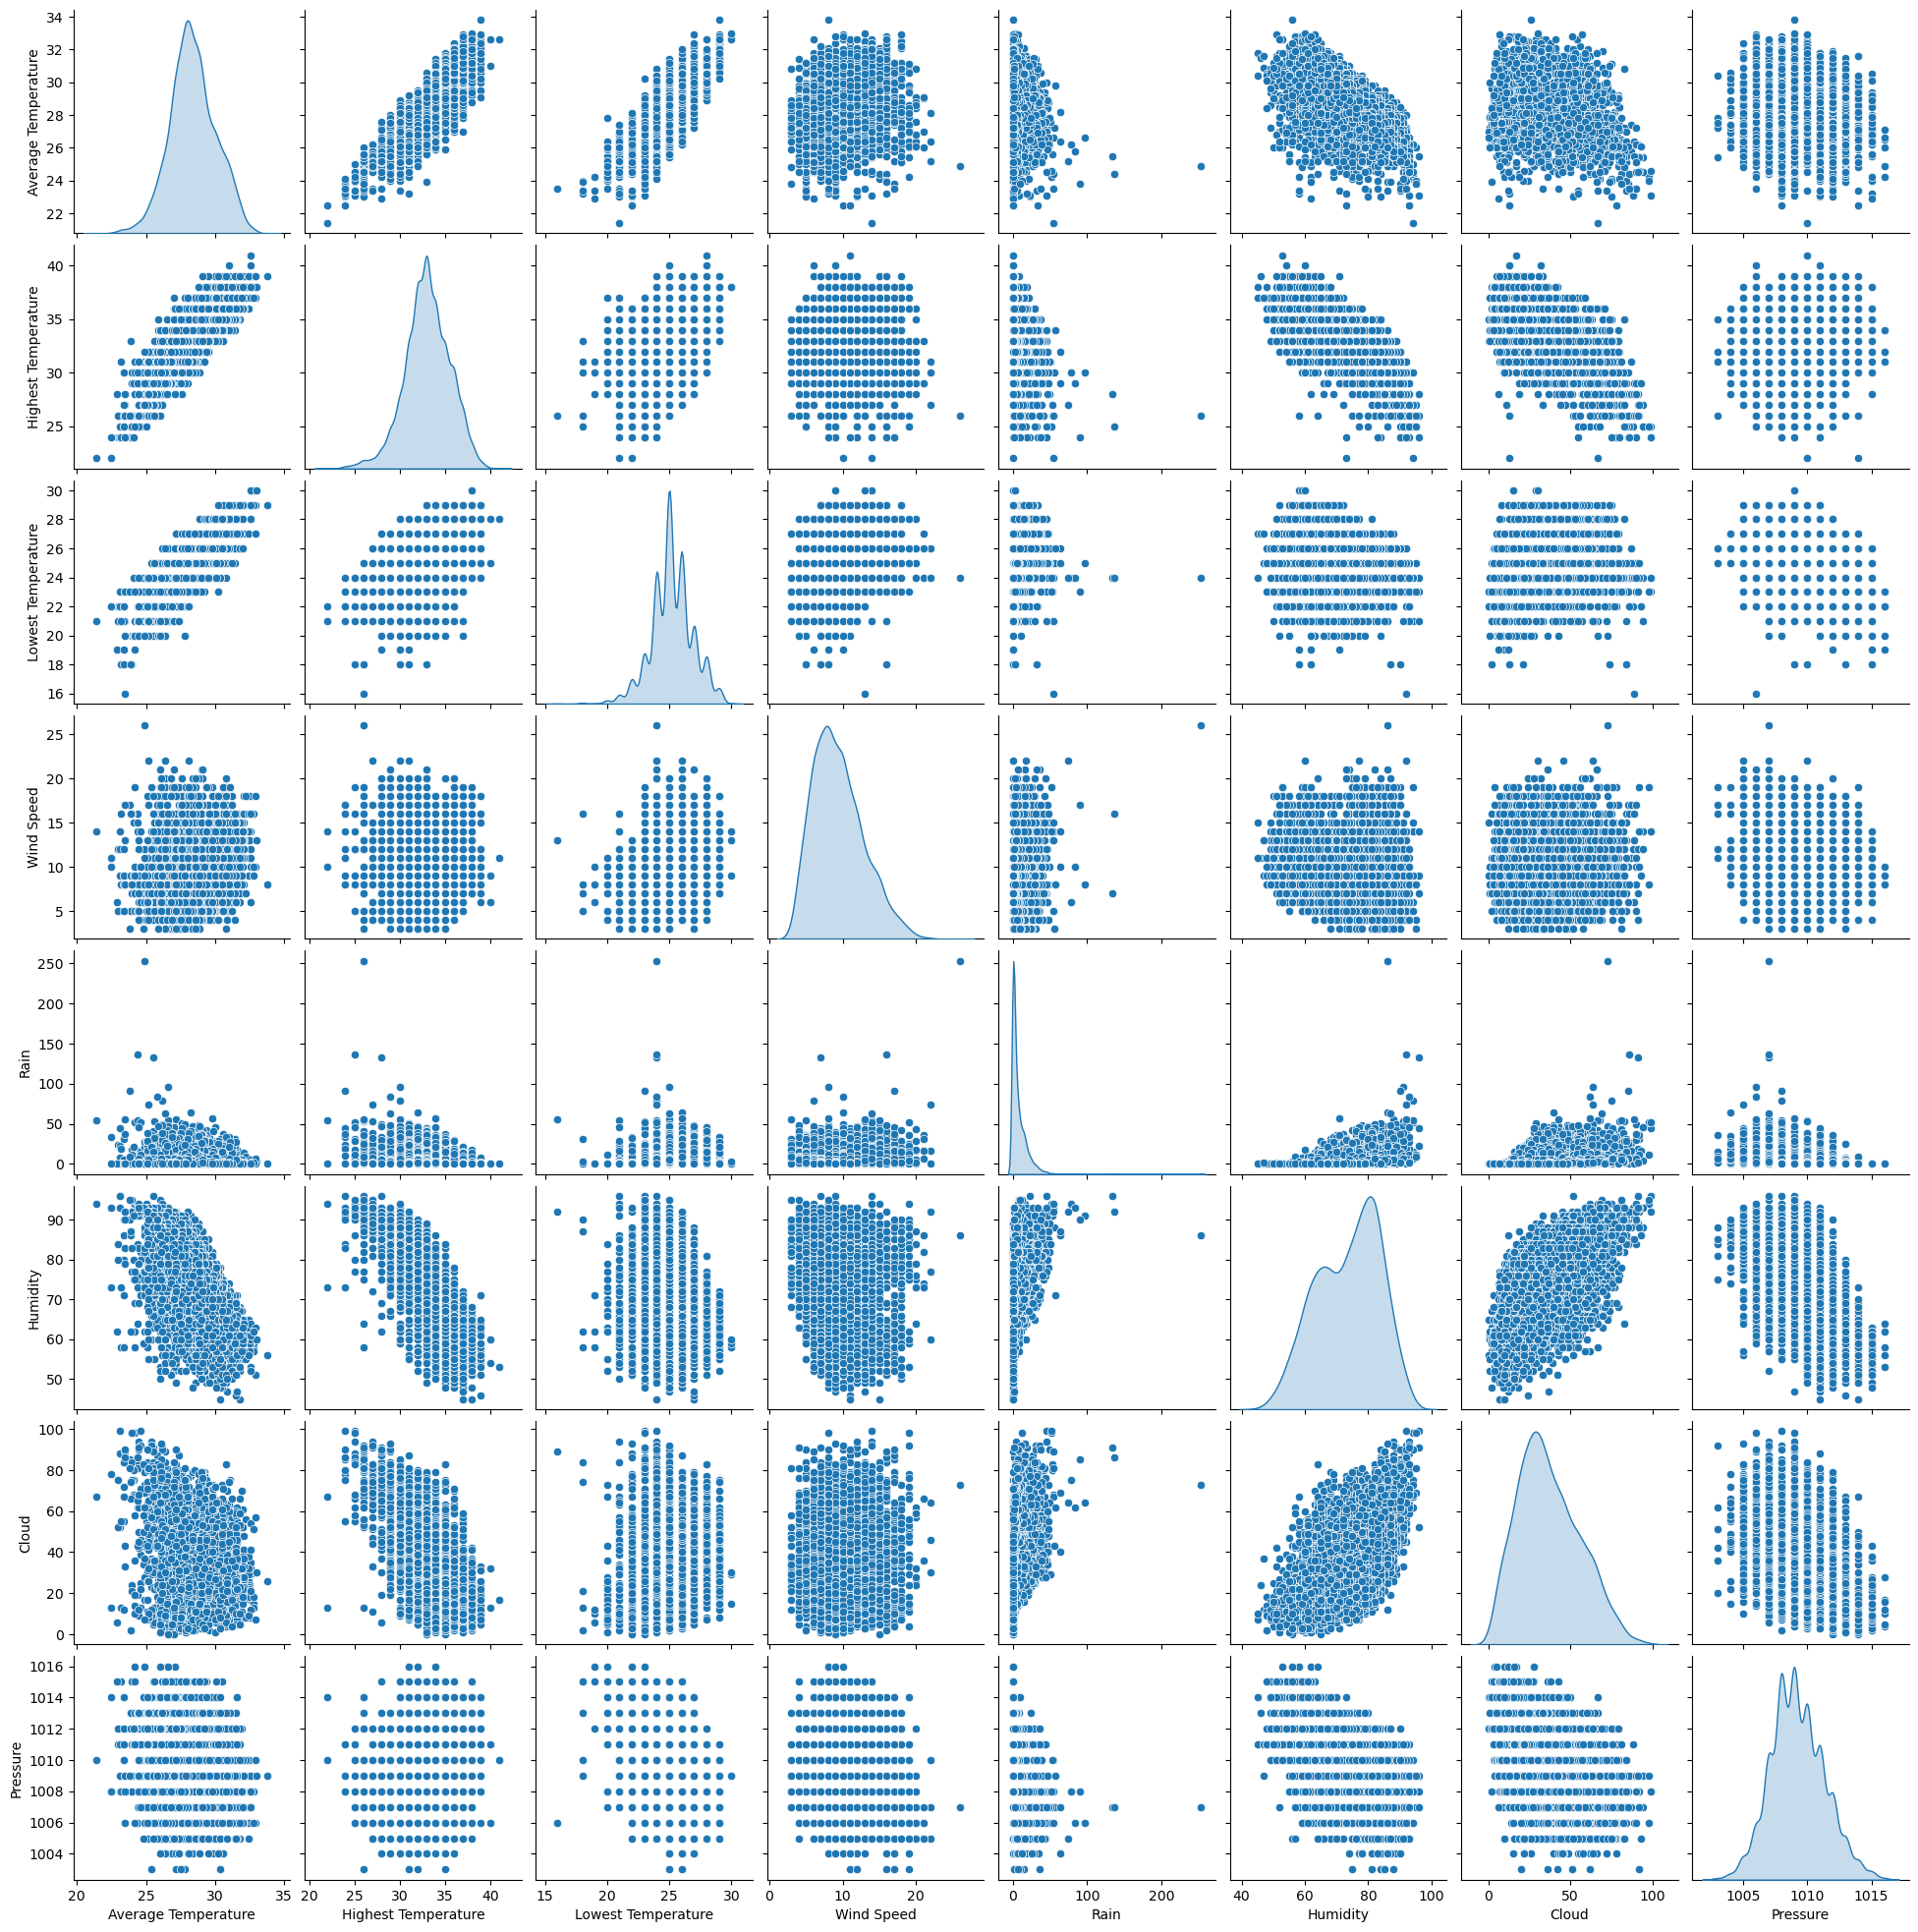

In [60]:
pair_plot_num = sns.pairplot(weather_df, diag_kind="kde");

**Có 1 vài thuộc tính có dữ liệu là phân phối lệch**

## C Chuẩn bị dữ liệu

## D Mô hình hóa dữ liệu

## E Đánh giá mô hình

In [2]:
df_weather = pd.read_csv("Data/hcm_weather_info.csv")

In [3]:
df_weather

,Date,Weather Type,Highest Temperature,Lowest Temperature,Wind Speed,Rain,Humidity,Cloud,Pressure
0,2010-01-01,Partly cloudy,34,24,6,0.0,59,20,1010
1,2010-01-02,Cloudy,32,24,7,0.0,61,48,1010
2,2010-01-03,Partly cloudy,33,26,7,0.0,65,37,1010
3,2010-01-04,Partly cloudy,35,25,9,0.1,61,42,1009
4,2010-01-05,Partly cloudy,35,26,10,0.0,57,35,1009
...,...,...,...,...,...,...,...,...,...
4375,2021-12-27,Light rain shower,34,23,5,1.8,73,61,1012
4376,2021-12-28,Patchy rain possible,33,24,8,0.6,72,56,1012
4377,2021-12-29,Light rain shower,32,23,8,2.2,79,64,1012
4378,2021-12-30,Cloudy,28,22,7,0.0,79,45,1013


In [4]:
df_weather['Mean'] = np.mean(df_weather[["Highest Temperature", "Lowest Temperature"]], axis = 1)

In [5]:
df_weather

,Date,Weather Type,Highest Temperature,Lowest Temperature,Wind Speed,Rain,Humidity,Cloud,Pressure,Mean
0,2010-01-01,Partly cloudy,34,24,6,0.0,59,20,1010,29.0
1,2010-01-02,Cloudy,32,24,7,0.0,61,48,1010,28.0
2,2010-01-03,Partly cloudy,33,26,7,0.0,65,37,1010,29.5
3,2010-01-04,Partly cloudy,35,25,9,0.1,61,42,1009,30.0
4,2010-01-05,Partly cloudy,35,26,10,0.0,57,35,1009,30.5
...,...,...,...,...,...,...,...,...,...,...
4375,2021-12-27,Light rain shower,34,23,5,1.8,73,61,1012,28.5
4376,2021-12-28,Patchy rain possible,33,24,8,0.6,72,56,1012,28.5
4377,2021-12-29,Light rain shower,32,23,8,2.2,79,64,1012,27.5
4378,2021-12-30,Cloudy,28,22,7,0.0,79,45,1013,25.0


In [55]:
df = df_weather.copy()

In [56]:
df.drop("Weather Type", axis=1)

,Date,Highest Temperature,Lowest Temperature,Wind Speed,Rain,Humidity,Cloud,Pressure,Mean
0,2010-01-01,34,24,6,0.0,59,20,1010,29.0
1,2010-01-02,32,24,7,0.0,61,48,1010,28.0
2,2010-01-03,33,26,7,0.0,65,37,1010,29.5
3,2010-01-04,35,25,9,0.1,61,42,1009,30.0
4,2010-01-05,35,26,10,0.0,57,35,1009,30.5
...,...,...,...,...,...,...,...,...,...
4375,2021-12-27,34,23,5,1.8,73,61,1012,28.5
4376,2021-12-28,33,24,8,0.6,72,56,1012,28.5
4377,2021-12-29,32,23,8,2.2,79,64,1012,27.5
4378,2021-12-30,28,22,7,0.0,79,45,1013,25.0


In [67]:
def extract_features_n_past_days(df, n):
    new_df= df.copy()
    rows = new_df.shape[0]
    features = new_df.columns.values
    features = np.delete(features,[0,1])
    for i in range(n):
        for feature in features:
            col_values_i = new_df[feature].shift(i+1)
            col_name = "{}_{}".format(feature, i+1)
            new_df[col_name] = col_values_i
    return new_df

In [68]:
new_dff = extract_features_n_past_days(df, 3)

In [69]:
features=["Date", "Weather Type",'Highest Temperature',
       'Lowest Temperature', 'Wind Speed', 'Rain', 'Humidity', 'Cloud',
       'Pressure']

In [70]:
new_dff.shape

(4380, 34)

In [71]:
new_dff.dropna(inplace=True)

In [72]:
new_dff.drop(features, axis = 1, inplace=True)

In [82]:
new_dff.reset_index(drop='index', inplace=True)

In [83]:
X = new_dff.drop("Mean", axis =1)

In [84]:
X

,Highest Temperature_1,Lowest Temperature_1,Wind Speed_1,Rain_1,Humidity_1,Cloud_1,Pressure_1,Mean_1,Highest Temperature_2,Lowest Temperature_2,...,Pressure_2,Mean_2,Highest Temperature_3,Lowest Temperature_3,Wind Speed_3,Rain_3,Humidity_3,Cloud_3,Pressure_3,Mean_3
0,33.0,26.0,7.0,0.0,65.0,37.0,1010.0,29.5,32.0,24.0,...,1010.0,28.0,34.0,24.0,6.0,0.0,59.0,20.0,1010.0,29.0
1,35.0,25.0,9.0,0.1,61.0,42.0,1009.0,30.0,33.0,26.0,...,1010.0,29.5,32.0,24.0,7.0,0.0,61.0,48.0,1010.0,28.0
2,35.0,26.0,10.0,0.0,57.0,35.0,1009.0,30.5,35.0,25.0,...,1009.0,30.0,33.0,26.0,7.0,0.0,65.0,37.0,1010.0,29.5
3,34.0,25.0,12.0,0.0,56.0,13.0,1010.0,29.5,35.0,26.0,...,1009.0,30.5,35.0,25.0,9.0,0.1,61.0,42.0,1009.0,30.0
4,35.0,25.0,10.0,0.0,55.0,12.0,1012.0,30.0,34.0,25.0,...,1010.0,29.5,35.0,26.0,10.0,0.0,57.0,35.0,1009.0,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,33.0,23.0,5.0,0.0,74.0,37.0,1012.0,28.0,32.0,23.0,...,1011.0,27.5,30.0,22.0,6.0,0.4,84.0,71.0,1011.0,26.0
4373,34.0,23.0,5.0,1.8,73.0,61.0,1012.0,28.5,33.0,23.0,...,1012.0,28.0,32.0,23.0,5.0,0.1,75.0,48.0,1011.0,27.5
4374,33.0,24.0,8.0,0.6,72.0,56.0,1012.0,28.5,34.0,23.0,...,1012.0,28.5,33.0,23.0,5.0,0.0,74.0,37.0,1012.0,28.0
4375,32.0,23.0,8.0,2.2,79.0,64.0,1012.0,27.5,33.0,24.0,...,1012.0,28.5,34.0,23.0,5.0,1.8,73.0,61.0,1012.0,28.5


In [85]:
y = new_dff['Mean']

In [86]:
y

0       30.0
1       30.5
2       29.5
3       30.0
4       29.5
        ... 
4372    28.5
4373    28.5
4374    27.5
4375    25.0
4376    27.5
Name: Mean, Length: 4377, dtype: float64

In [34]:
ratio = 4377 *0.9
ratio

3939.3

In [87]:
X_train = X[X.index<ratio] 
y_train = y[y.index<ratio]

In [88]:
X_train.shape

(3940, 24)

In [89]:
y_train.shape

(3940,)

In [90]:
X_test = X[X.index>=ratio] 
y_test = y[y.index>=ratio]

In [91]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
regr = linear_model.LinearRegression()

In [93]:
regr.fit(X_train, y_train)

LinearRegression()

In [95]:
predict = regr.predict(X_test)

In [97]:
regr.score(X_train, y_train)

0.7452149304962881

In [98]:
regr.score(X_test, y_test)

0.6151096838990586

In [99]:
from sklearn.svm import SVR

In [100]:
svr = SVR(kernel='rbf', C=1e2, gamma=0.0001)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [101]:
svr.score(X_train, y_train)

0.7827264060197915

In [102]:
svr.score(X_test, y_test)

0.6203947484803438

# PHẦN 3: TỔNG HỢP KẾT QUẢ